# Data Analytics and Visualization with Python

### Learning Objective - 

- Read data from auto-mpg dataset
- CLeaning data
- Explore additional chart types
- Use functions from plotly library
- Create and publish interactive charts using plotly and Dash.set

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read Data from auto-mpg dataset

In [ ]:
df = pd.read_csv("./Datasets/auto-mpg.csv")
df.head()

### Clean Data

#### Check for Nulls

In [ ]:
df.isna().any()

#### Check for data types

In [ ]:
df.dtypes

###### Convert column horsepower to int

In [ ]:
df.horsepower.str.isdigit().all()

In [ ]:
df.horsepower[~df.horsepower.str.isdigit()]

In [ ]:
df.replace({"?" : 0}, inplace=True)

In [ ]:
df.horsepower = df.horsepower.astype(int)
df.head()

###### Extracting columns based on datatype

In [ ]:
df.select_dtypes("number")

#### Extracting selected columns

In [ ]:
df.columns

In [ ]:
data = df[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
data.head()

###### Outliers

In [ ]:
_ = data.plot(kind = "box", subplots = True, figsize = (10, 6), layout =(2, 3))

###### Histogram

In [ ]:
data.columns

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize = (10, 6))

for i, col in enumerate(data.columns):
    sns.histplot(data, x = col, kde = True, ax = ax[i//3,i%3])

###### Colinearity between mpg and other columns

In [ ]:
_ = sns.pairplot(data, y_vars = "mpg", x_vars = ['cylinders', 'displacement', 'horsepower', 'weight','acceleration'])

###### Visualize Multicolinearity

In [ ]:
_ = sns.pairplot(data)

In [ ]:
data.corr()

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
origins = {1 : "USA", 2 : "Germany", 3 : "Japan"}
df.origin = df.origin.map(origins)
df.head(2)

###### Ex. Avg mpg of cars manufactured in each country in each year

In [ ]:
df.pivot_table(index = "origin", columns="model year", values="mpg").round()

In [ ]:
df.pivot_table(index = "origin", columns="model year", values="mpg", aggfunc="sum").round()

In [ ]:
df.pivot_table(index = "origin", columns="model year", values="car name", aggfunc=lambda x : x.nunique()).round()

In [ ]:
df.pivot_table(index = ["origin", "cylinders"], columns="model year", values="car name", aggfunc=lambda x : x.nunique()).round()

In [ ]:
df.duplicated().any()  # no duplicate row

In [ ]:
df["car name"].duplicated().any()

In [ ]:
data = df.pivot_table(index = ["origin","model year"], values="car name", aggfunc=lambda x : x.nunique()).round().reset_index()
data.head()

In [ ]:
plt.figure(figsize = (12, 3))
sns.barplot(data, y = "car name", x = "model year", hue = "origin")

###### Unpivot columns

In [ ]:
data = df.pivot_table(index = "origin", columns="model year", values="car name", aggfunc=lambda x : x.nunique()).round()
data.head()

In [ ]:
data.reset_index()

In [ ]:
pd.melt(data.reset_index(), id_vars=["origin"], var_name="model year", value_name="car name")

## Data Visualisation using plotly

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
px.bar(df, x = "`origin", y = "mpg")

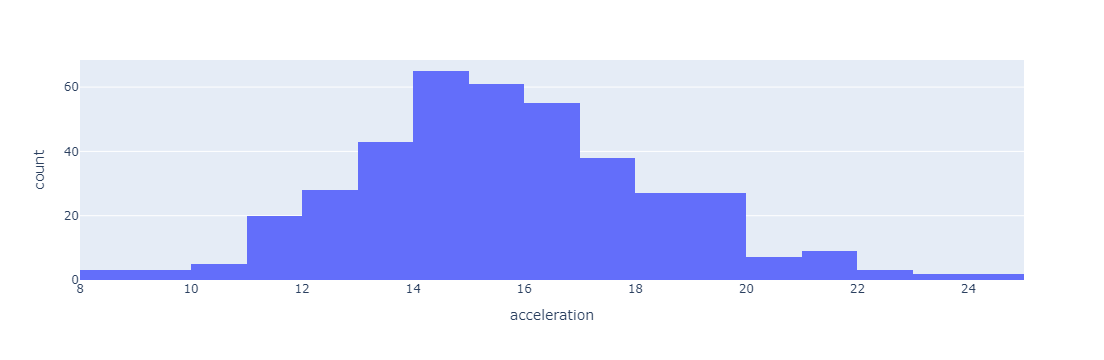

In [139]:
fig = px.histogram(df, x = "acceleration", width=500)
fig.show()

In [ ]:
px.histogram(df, x = "acceleration", color = "origin", width=500)

In [ ]:
px.bar(data, x = "model year", y = "car name", color = "origin", barmode="group")

In [ ]:
px.histogram(df, x = "origin", y = "mpg", text_auto=True, color = "origin", width=500, histfunc="avg")

In [ ]:
px.scatter(df, x = "horsepower", y = "mpg", width = 500, color = "origin", size="mpg")

In [ ]:
px.scatter(df, x = "horsepower", y = "mpg", width = 800, facet_col = "origin", trendline="ols")